In [1]:
import os
from broad_qc import read_dataframes, calculate_metrics, format_metrics, plot_reads_vs_sampleID_reversed, extract_samples_from_files

In [2]:
metrics_path = '/gale/netapp/seq11/illumina_runs/qc_metrics/'
file = 'LP-MORONK894930_Broad_QC__SALK064_SALK065__227JWVLT4.csv'
pool_string = "SALK064_SALK065"

In [3]:
pool_strings = pool_string.split("_")
# Create the list of file paths using list comprehension
pool_files = [os.path.join(metrics_path, pool) for pool in pool_strings]
print(pool_files)
file_path = f'{metrics_path}/{file}'

['/gale/netapp/seq11/illumina_runs/qc_metrics/SALK064', '/gale/netapp/seq11/illumina_runs/qc_metrics/SALK065']


In [4]:
demux_stats, top_unknown_barcodes = read_dataframes(file_path)
metrics = calculate_metrics(demux_stats, top_unknown_barcodes)
formatted_metrics = format_metrics(metrics)

In [5]:
print("@card Broad sequencing QC metrics accepted")
for key, value in formatted_metrics.items():
        print(f"{key}: {value}")

@card Broad sequencing QC metrics accepted
run_yield: 9,057,204,022,289 Reads PF
run_yield_excluding_undetermined: 8,539,371,755,810 Reads PF
total_reads: 29,935,983,965 Reads PF
assumed_phiX_reads: 606,843,808 Reads PF
percent_phix_assumed: 2.03%
pool_with_fewest_reads_in_a_lane: UWA7648_BS080910_MoTg_1_P8-1-I15: 79,333,112


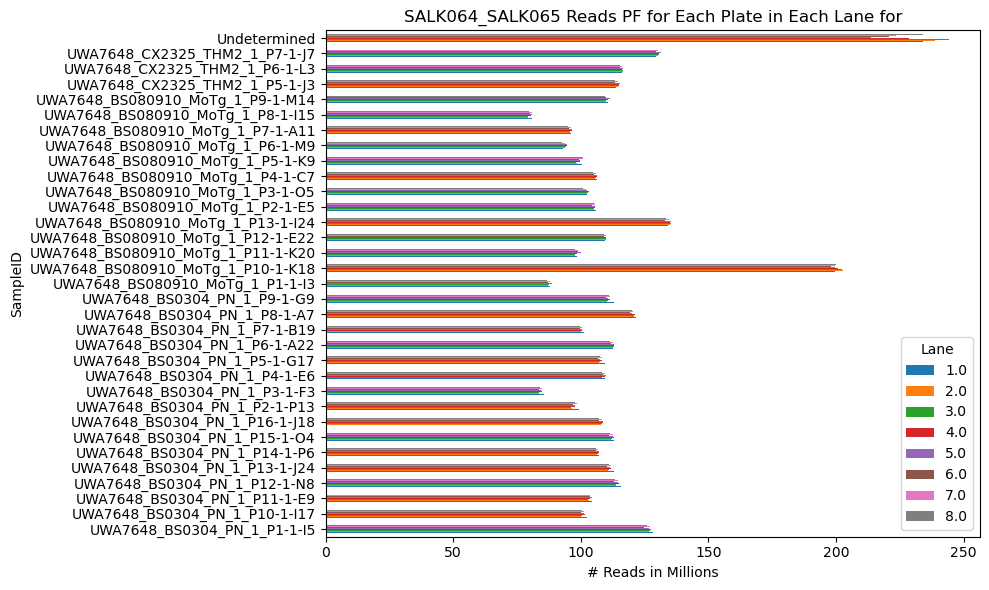

<Figure size 1000x600 with 0 Axes>

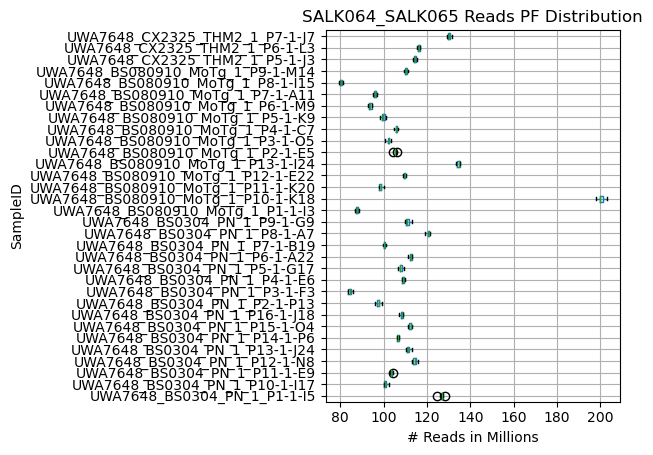

In [6]:
plot_reads_vs_sampleID_reversed(demux_stats, metrics_path ,pool_string)

In [7]:
pools = extract_samples_from_files(demux_stats, pool_files)

In [8]:
# Initialize an empty list to store formatted_metrics
all_formatted_metrics = []

for file_path, pool in pools.items():
    metrics = calculate_metrics(pool, top_unknown_barcodes)
    formatted_metrics = format_metrics(metrics)
    
    # Append the formatted_metrics dictionary to the list
    all_formatted_metrics.append(formatted_metrics)
        
    #plot_reads_vs_sampleID_reversed(pool, metrics_path , os.path.basename(file_path))

In [11]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} pool_with_fewest_reads_in_a_lane: {metrics.get('pool_with_fewest_reads_in_a_lane')} Reads PF")

SALK064 pool_with_fewest_reads_in_a_lane: UWA7648_BS0304_PN_1_P3-1-F3: 83,479,445 Reads PF
SALK065 pool_with_fewest_reads_in_a_lane: UWA7648_BS080910_MoTg_1_P8-1-I15: 79,333,112 Reads PF


In [13]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} total_reads: {metrics.get('total_reads')}")

SALK064 total_reads: 13,819,728,320 Reads PF
SALK065 total_reads: 14,278,913,542 Reads PF
